In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PrepareData import prepare_dataset
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../seal_wrapper/')
from seal_wrapper import EA

## Prepare dataset

In [2]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset()

/home/simon/Dissertation/Abalone/PrepareData.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])
/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3383, 10) (3383,)
(376, 10) (376,)
(418, 10) (418,)


## Encrypted Linear model

In [4]:
model_lin_weights = np.load('model_lin_weights.npy')

In [5]:
X_test_enc = EA(X_test.values, True)

In [6]:
w = EA(model_lin_weights[0])
b = EA(model_lin_weights[1].reshape(1, -1))

In [7]:
pred = X_test_enc.dot(w) + b
pred.shape

(418, 1)

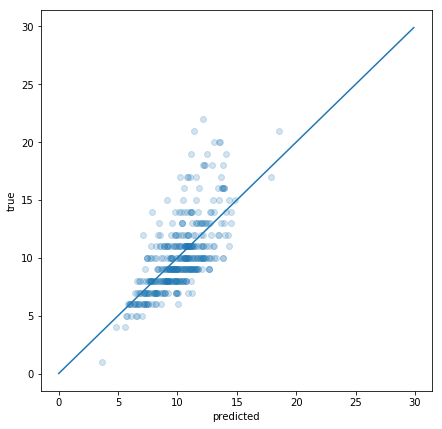

In [8]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred.values().flatten(), y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

## Sum Squared Error of encrypted and clear data

In [9]:
sse_enc = np.sum((pred.values().flatten() - y_test)**2)
sse_enc

2069.4778883855115

In [10]:
pred_clear = np.dot(X_test, model_lin_weights[0]) + model_lin_weights[1]
sse_clear = np.sum((pred_clear.flatten() - y_test)**2)
sse_clear

2069.4778883855115

## Sigmoid model - 1 Layer

In [11]:
sig_weights = np.load('model_sig_weights.npy')

In [12]:
w1, b1, scale, shift, mean, std, w2, b2 = sig_weights

In [13]:
def normalize_weights(w, var, scale):
    return w * scale / np.sqrt(var + 0.000000009)

In [14]:
def normalize_bias(b, mean, var, shift, scale):
    return (b + mean) * (scale / np.sqrt(var + 0.000000009)) - shift

In [15]:
w_norm = normalize_weights(w1, std**2, scale)
b_norm = normalize_bias(b1, mean, std**2, shift, scale)

In [16]:
w1 = EA(w_norm)
b1 = EA(b_norm.reshape(1, -1))
w2 = EA(w2)
b2 = EA(b2.reshape(1, -1))

In [17]:
layer1 = X_test_enc.dot(w1) + b1
layer1_sig = layer1.activate_sigmoid()
pred = layer1_sig.dot(w2) + b2

0.5000000000000002
-0.289291169651081
-0.578582339302162

0.5000000000000002
0.7323966385286336
1.4647932770572671

0.5000000000000002
-0.2110223351780265
-0.42204467239270205

0.5000000000000002
0.04177168177867804
0.08354336355735607

0.5000000000000002
-0.10359504490223582
-0.20719008980447165

0.5000000000000002
1.9136416322287098
3.8272832665724015

0.5000000000000002
0.8504583997675322
1.7009167995350645

0.5000000000000002
0.4704589240010654
0.9409178480021309

0.5000000000000002
-1.6159454140310945
-3.231890828062189

0.5000000000000002
-0.36318626704067625
-0.7263725340813525

0.5000000000000002
0.8084860161952113
1.6169720323904226

0.5000000000000002
1.1559432962603482
2.3118865926214096

0.5000000000000002
-0.668216001154545
-1.33643200230909

0.5000000000000002
0.4978595269965066
0.9957190539930132

0.5000000000000002
1.6505747613670392
3.3011495227340784

0.5000000000000002
-0.1749391903108384
-0.3498783806216768

0.5000000000000002
-0.3629758405122116
-0.7259516810244232

0.5000000000000002
0.8651571585353228
1.7303143170706456

0.5000000000000002
-0.8773387913469505
-1.754677582693901

0.5000000000000002
0.3740183708843149
0.7480367417686298

0.5000000000000002
1.854649717867077
3.709299435734154

0.5000000000000002
1.163596507576035
2.32719301515207

0.5000000000000002
0.8221558062027607
1.6443116124055215

0.5000000000000002
0.29780507855189775
0.5956101571029668

0.5000000000000002
0.26196308700904675
0.5239261740180935

0.5000000000000002
0.12561088414642274
0.2512217682928455

0.5000000000000002
2.4012149474473676
4.802429894894735

0.5000000000000002
0.03326420834368814
0.06652841668737627

0.5000000000000002
-0.16102686191505095
-0.3220537238301019

0.5000000000000002
0.6727311612709542
1.3454623225419085

0.5000000000000002
-0.8118899653913197
-1.6237799307826395

0.5000000000000002
-0.3386713188820865
-0.677342637764173

0.5000000000000002
0.9611390040983421
1.9222780062075593

0.5000000000000002
-1.0295069797096803
-2.0590139594193606

0.5000

1.7486869138391055

0.5000000000000002
-0.5118309033406755
-1.023661806681351

0.5000000000000002
0.7081900891417889
1.4163801782835779

0.5000000000000002
-0.09880138679418526
-0.19760277358837053

0.5000000000000002
-0.5388204995515324
-1.0776409991030649

0.5000000000000002
0.6412194470207466
1.2824388940414932

0.5000000000000002
0.8238871720944435
1.647774344188887

0.5000000000000002
-0.4763419555498342
-0.9526839110996684

0.5000000000000002
0.6567822873091602
1.3135645746183204

0.5000000000000002
1.165856024917114
2.331712049834228

0.5000000000000002
0.2912761363200955
0.582552272640191

0.5000000000000002
-0.018515954351585474
-0.03703190870317095

0.5000000000000002
-0.2444278086324548
-0.4888556172649096

0.5000000000000002
0.7915157569057022
1.5830315138114044

0.5000000000000002
0.3311405308837666
0.6622810617675332

0.5000000000000002
2.566443371713094
5.132886743426188

0.5000000000000002
0.4569929285318232
0.9139858570636464

0.5000000000000002
0.12815764416733758
0.2

0.5000000000000002
-0.721882914109398
-1.443765828218796

0.5000000000000002
-0.2783035885138541
-0.5566071770277082

0.5000000000000002
1.1132544116219312
2.2265088232438623

0.5000000000000002
-1.072783403810013
-2.145566807620026

0.5000000000000002
-0.5095697000640853
-1.0191394001281706

0.5000000000000002
0.7224794269263322
1.4449588538442373

0.5000000000000002
-0.6319755889684734
-1.2639511779369468

0.5000000000000002
-0.13649950594496338
-0.27299901188992676

0.5000000000000002
1.4302074338265438
2.8604148676530876

0.5000000000000002
-0.7028842103840702
-1.4057684207681405

0.5000000000000002
-0.1842453598147864
-0.3684907196295728

0.5000000000000002
0.4340411125980398
0.8680822251960796

0.5000000000000002
-0.8883518715001918
-1.7767037430003836

0.5000000000000002
-0.30747046089598623
-0.6149409217919725

0.5000000000000002
0.99777395122332
1.9955479033530608

0.5000000000000002
-0.4665789261032352
-0.9331578522064704

0.5000000000000002
0.8355315224679327
1.6710630449358

1.0601537906443443

0.5000000000000002
2.5894309866131198
5.1788619732262395

0.5000000000000002
-0.567325309744906
-1.134650619489812

0.5000000000000002
-0.011981278745175628
-0.023962557490351255

0.5000000000000002
0.5611287108848847
1.1222574217697694

0.5000000000000002
-0.526037346537749
-1.052074693075498

0.5000000000000002
-0.08713689101081996
-0.17427378202163993

0.5000000000000002
0.9722427699283893
1.9444855398567786

0.5000000000000002
-0.41572467057242696
-0.8314493411448539

0.5000000000000002
0.07589603322375116
0.15179206644750232

0.5000000000000002
0.03731521437002261
0.07463042874004522

0.5000000000000002
-1.070516386009907
-2.141032772019814

0.5000000000000002
0.26030642626430966
0.5206128525286193

0.5000000000000002
1.9683403093076
3.9366806186374426

0.5000000000000002
-0.7841106079966278
-1.5682212159932556

0.5000000000000002
0.43891500205482337
0.8778300041096467

0.5000000000000002
0.2300159352552278
0.4600318705107318

0.5000000000000002
-0.793301021258

-0.7545613405752807
-1.5091226811505614

0.5000000000000002
0.45030424273528447
0.9006084854705689

0.5000000000000002
1.9103771987516152
3.8207543975032303

0.5000000000000002
-0.14326591093636495
-0.2865318218727299

0.5000000000000002
-0.3321007194321247
-0.6642014388642494

0.5000000000000002
0.03475225460703801
0.06950450921407603

0.5000000000000002
0.8256888533778226
1.6513777067556452

0.5000000000000002
0.4646134438970144
0.9292268877940288

0.5000000000000002
0.7158057100440036
1.4316114200880072

0.5000000000000002
0.930716442877267
1.861432885754534

0.5000000000000002
0.6324265394039568
1.2648530788079135

0.5000000000000002
2.018654643909092
4.037309287809757

0.5000000000000002
-0.014242059732117193
-0.028484119464234386

0.5000000000000002
0.4315096294753646
0.8630192589507292

0.5000000000000002
1.6005296404046674
3.2010592808009073

0.5000000000000002
-0.05645787225284338
-0.11291574450568675

0.5000000000000002
0.37472410436790593
0.7494482087358119

0.50000000000000

0.5000000000000002
0.8129352258011101
1.6258704516022202

0.5000000000000002
-0.35867725795589717
-0.7173545159117943

0.5000000000000002
0.15160377300957376
0.3032075460191475

0.5000000000000002
1.665135445058805
3.33027089011761



In [18]:
pred

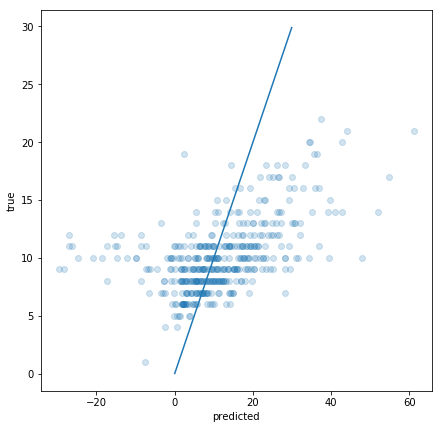

In [19]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
ax.scatter(pred.values().flatten(), y_test, alpha=0.2)
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))

In [20]:
sse_enc = np.sum((pred.values().flatten() - y_test)**2)
sse_enc

54427.439148107354

In [21]:
pred_clear = np.dot(X_test, model_lin_weights[0]) + model_lin_weights[1]
sse_clear = np.sum((pred_clear.flatten() - y_test)**2)
sse_clear

2069.4778883855115